In [6]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd

In [7]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [8]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [9]:
def calculate_atr(df, period=20):
    # 计算真实波动范围 (TR)
    high_low = df['high'] - df['low']
    high_close_prev = abs(df['high'] - df['close'].shift(1))
    low_close_prev = abs(df['low'] - df['close'].shift(1))
    tr = pd.concat([high_low, high_close_prev, low_close_prev], axis=1).max(axis=1)
    
    # 计算平均真实波动范围 (ATR)
    atr = tr.rolling(window=period, min_periods=1).mean()
    
    # 直接返回 ATR 序列（Series）
    return atr

In [10]:
evaluator.set_factor(
    factor_data_or_func=calculate_atr,
    factor_name='calculate_atr'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.000000
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): 0.005600
   Rank_IC (Spearman): 0.016813
📊 信息比率:
   IR: 0.206964
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130267
   因子列: calculate_atr
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


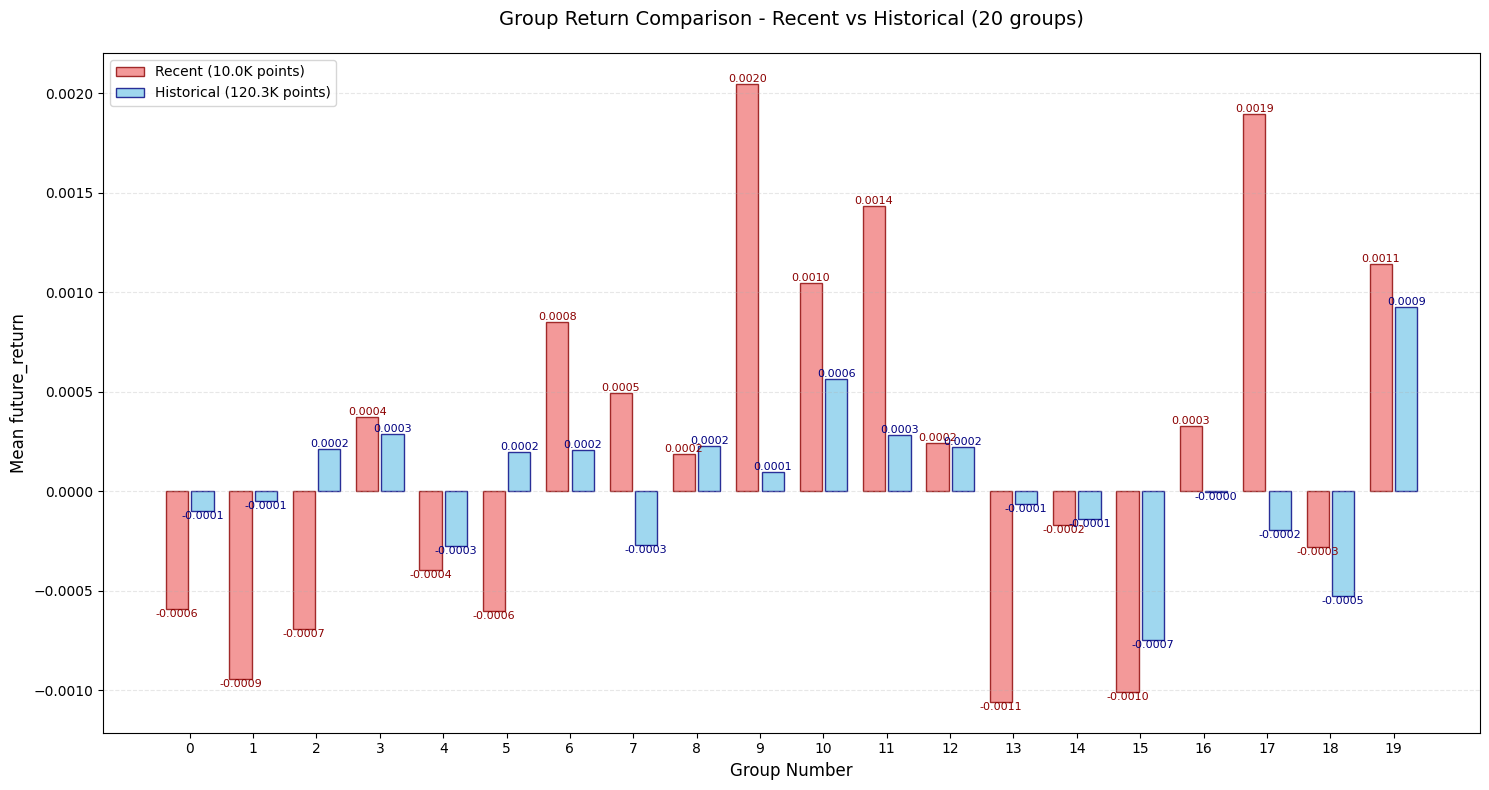

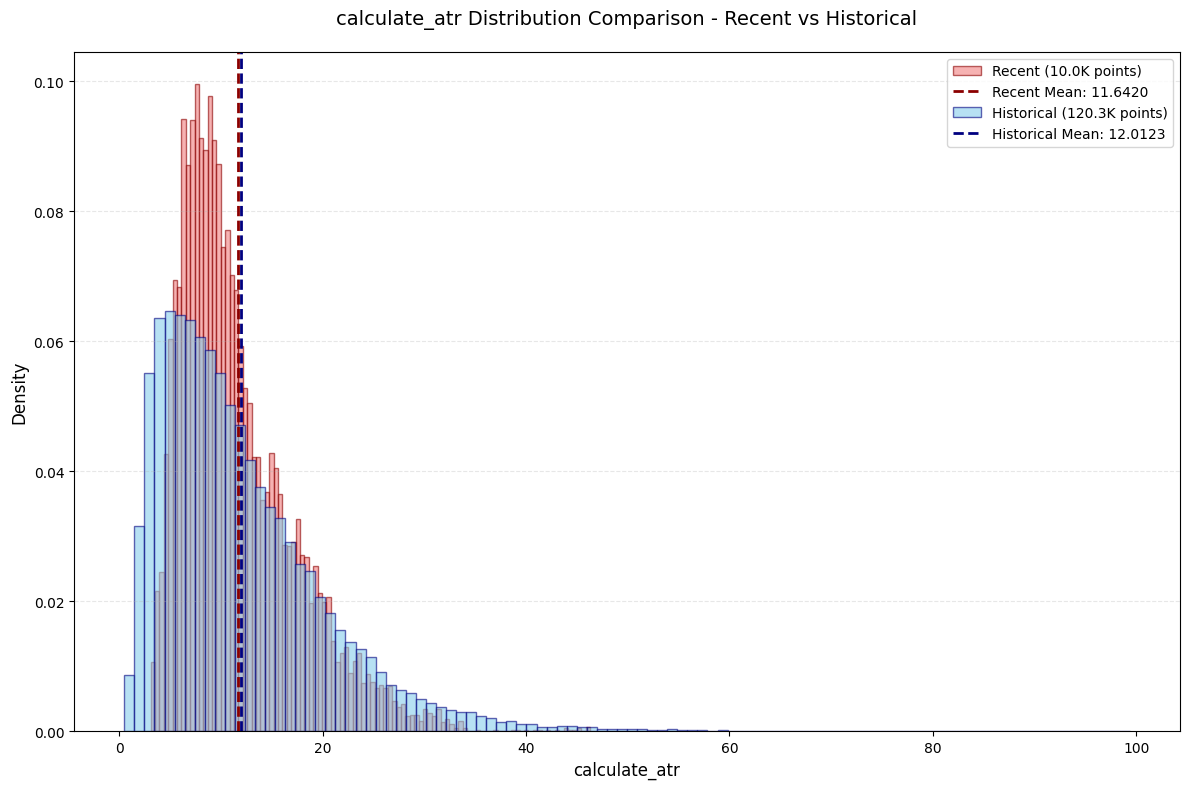

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [11]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)